In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("Hospital General Information.csv", encoding= 'latin')

#23. Plot the distribution of hospital ratings using a histogram.


In [8]:
print(df['Hospital overall rating'].unique())

['3' '2' 'Not Available' '4' '5' '1']


In [9]:
df_rated = df[df['Hospital overall rating'] != 'Not Available'].copy()
df_rated['Hospital overall rating'] = df_rated['Hospital overall rating'].astype(int)

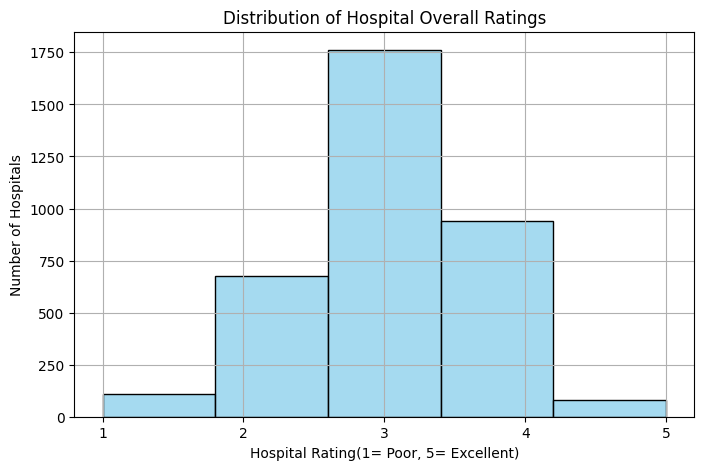

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df_rated['Hospital overall rating'], bins=5, kde=False, color='skyblue')

plt.title('Distribution of Hospital Overall Ratings')
plt.xlabel('Hospital Rating(1= Poor, 5= Excellent)')
plt.ylabel('Number of Hospitals')
plt.xticks([1,2,3,4,5])
plt.grid(True)
plt.show()

#24. Create a bar chart showing the top 10 states with the most hospitals.

In [11]:
top_states = df['State'].value_counts().head(10).reset_index()
top_states.columns = ['State', 'Hospital_Count']
print(top_states)

  State  Hospital_Count
0    TX             411
1    CA             343
2    FL             187
3    IL             180
4    PA             171
5    NY             171
6    OH             168
7    KS             137
8    GA             133
9    MN             131


<ipython-input-12-38f7f6bb0ee2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Hospital_Count', palette='Blues_d')


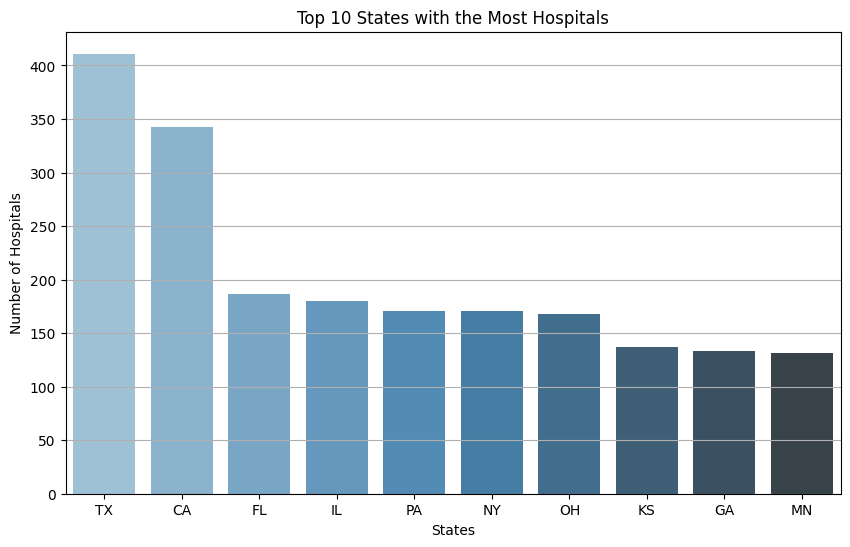

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='State', y='Hospital_Count', palette='Blues_d')
plt.title('Top 10 States with the Most Hospitals')
plt.ylabel('Number of Hospitals')
plt.xlabel('States')
plt.grid(True, axis='y')
plt.show()

#25. Generate a heatmap to visualize correlations between numerical features.

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df_numeric = df[df['Hospital overall rating'] != 'Not Available'].copy()
df_numeric['Hospital overall rating'] = df_numeric['Hospital overall rating'].astype(int)

In [15]:
rating_map = {
    'Below the National Average': 1,
    'Same as the National Average' : 2,
    'Above the National Average': 3
}

for col in['Mortality national comparison', 'Safety of care national comparison',
           'Patient experience national comparison', 'Timely and effective care national comparison']:
     if col in df.columns:
      df_numeric[col] = df_numeric[col].map(rating_map)


In [16]:
numeric_df = df_numeric.select_dtypes(include=['int64', 'float64'])
correaltion_matrix = numeric_df.corr()

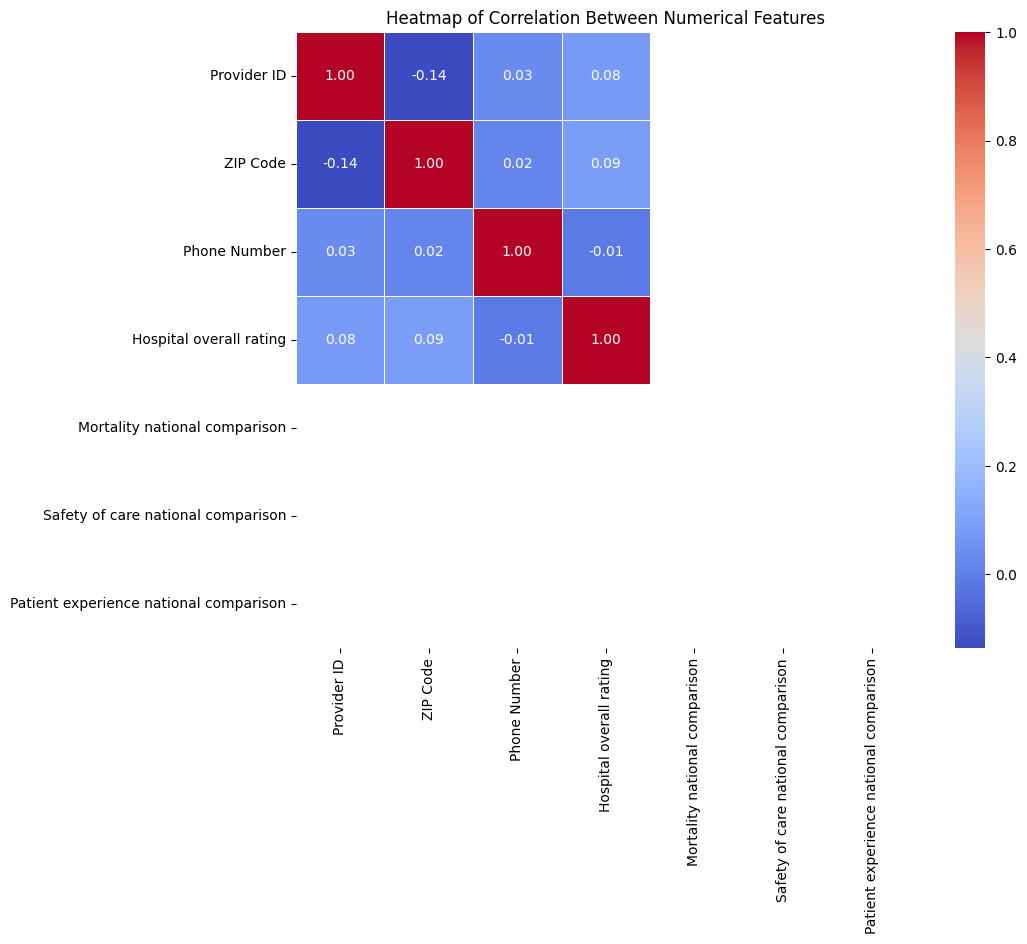

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(correaltion_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()

#26. Plot a scatter plot of patient experience ratings vs. overall hospital ratings.

In [18]:
print(df['Patient experience national comparison'].unique())
print(df['Hospital overall rating'].unique())

['Below the national average' 'Same as the national average'
 'Not Available' 'Above the national average']
['3' '2' 'Not Available' '4' '5' '1']


In [19]:
df_clean = df[
    (df['Patient experience national comparison'] != 'Not Available') &
    (df['Hospital overall rating'] != 'Not Available')
].copy()

df_clean['Hospital overall rating'] = df_clean['Hospital overall rating'].astype(int)

experience_map ={
    'Below the National Average' : 1,
    'Same as the National Average' :2,
    'Above the National Average' : 3,
}

df_clean['Patient_Experience_Score'] = df_clean['Patient experience national comparison'].map(experience_map)

<ipython-input-20-329f18e2b0e2>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


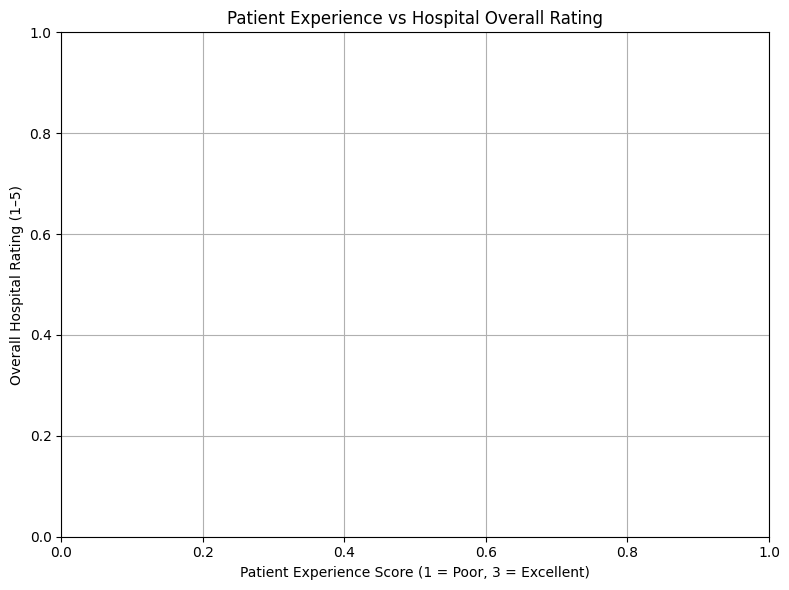

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x='Patient_Experience_Score',
    y='Hospital overall rating',
    hue='Patient_Experience_Score',
    palette='coolwarm',
    alpha=0.7
)

plt.title('Patient Experience vs Hospital Overall Rating')
plt.xlabel('Patient Experience Score (1 = Poor, 3 = Excellent)')
plt.ylabel('Overall Hospital Rating (1–5)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
corr = df_clean[['Patient_Experience_Score', 'Hospital overall rating']].corr().iloc[0, 1]
print(f"Correlation: {corr:.2f}")

Correlation: nan


#27. Visualize the average hospital rating by hospital ownership using a box plot.

In [22]:
df_box = df[
    (df['Hospital overall rating'] != 'Not Available') &
    (df['Hospital Ownership'].notna())
].copy()

df_box['Hospital overall rating'] = df_box['Hospital overall rating'].astype(int)


<ipython-input-23-18ca4ea9a8d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


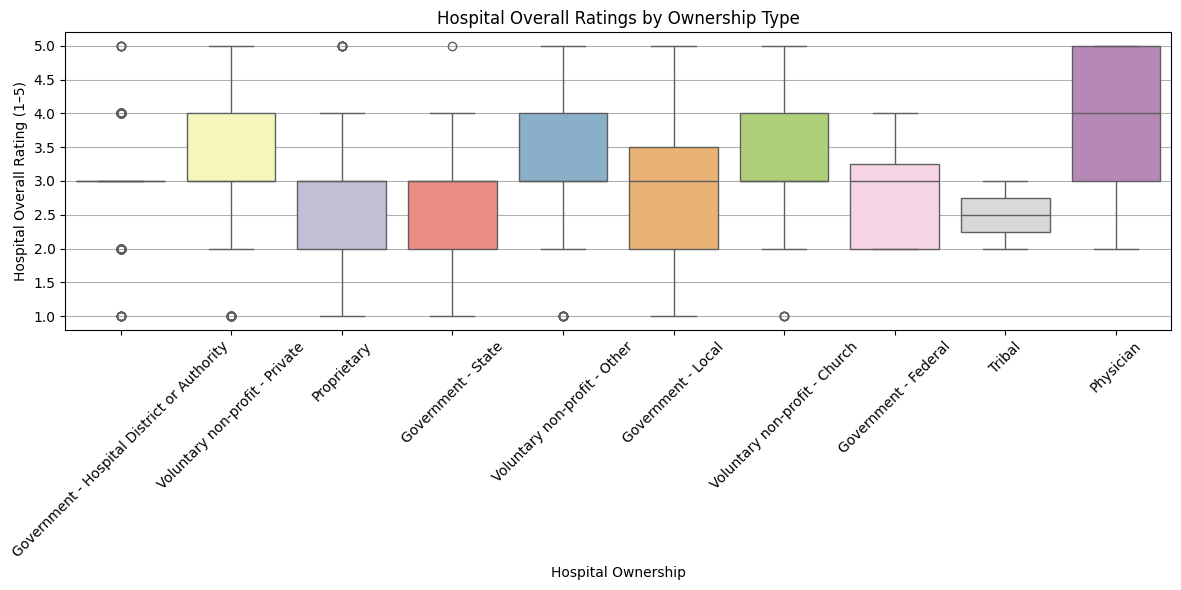

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_box,
    x='Hospital Ownership',
    y='Hospital overall rating',
    palette='Set3'
)

plt.title('Hospital Overall Ratings by Ownership Type')
plt.xlabel('Hospital Ownership')
plt.ylabel('Hospital Overall Rating (1–5)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#28. Create a grouped bar chart comparing hospital ratings across different ownership types.

In [24]:
df_grouped = df[
    (df['Hospital overall rating'] != 'Not Available') &
    (df['Hospital Ownership'].notna())
].copy()

df_grouped['Hospital overall rating'] = df_grouped['Hospital overall rating'].astype(int)


In [25]:
# Count of hospitals by ownership and rating
grouped_data = df_grouped.groupby(['Hospital Ownership', 'Hospital overall rating']).size().reset_index(name='Count')

# Pivot the table to wide format for grouped bar plotting
pivot_data = grouped_data.pivot(index='Hospital Ownership', columns='Hospital overall rating', values='Count').fillna(0)

# Sort columns numerically (ratings 1 to 5)
pivot_data = pivot_data[[1, 2, 3, 4, 5]]


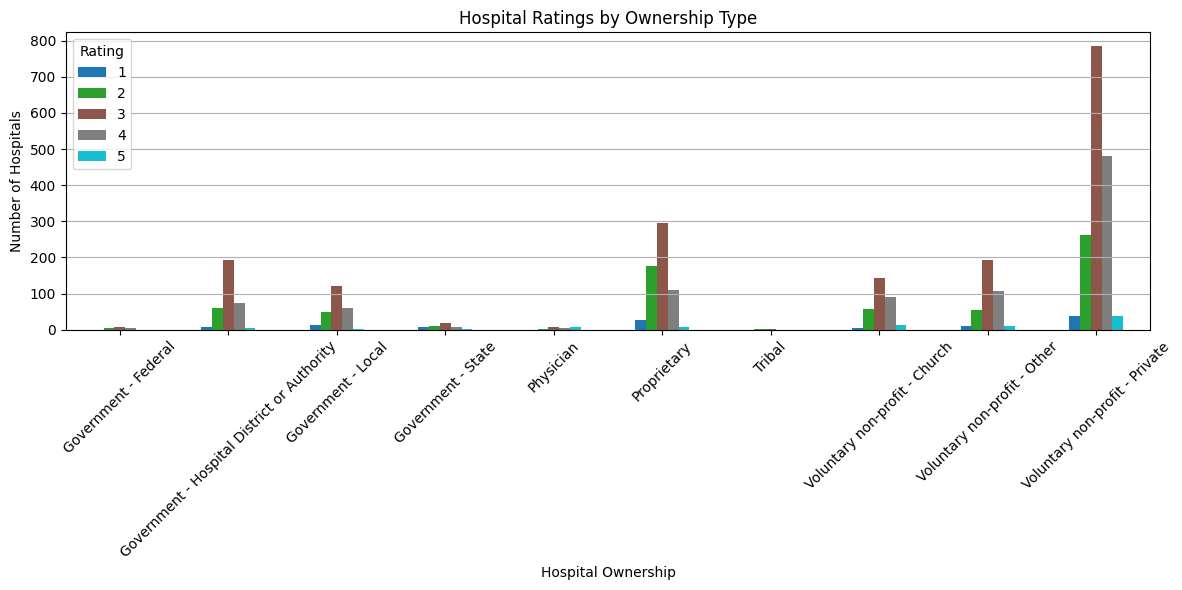

In [26]:
pivot_data.plot(kind='bar', figsize=(12, 6), colormap='tab10')

plt.title('Hospital Ratings by Ownership Type')
plt.xlabel('Hospital Ownership')
plt.ylabel('Number of Hospitals')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#29. Show a violin plot of readmission ratings across different states.

In [28]:
print(df.columns)

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [33]:
df.columns = df.columns.str.strip()

In [34]:
print(df.columns.tolist())

['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for meaningful use of EHRs', 'Hospital overall rating', 'Hospital overall rating footnote', 'Mortality national comparison', 'Mortality national comparison footnote', 'Safety of care national comparison', 'Safety of care national comparison footnote', 'Readmission national comparison', 'Readmission national comparison footnote', 'Patient experience national comparison', 'Patient experience national comparison footnote', 'Effectiveness of care national comparison', 'Effectiveness of care national comparison footnote', 'Timeliness of care national comparison', 'Timeliness of care national comparison footnote', 'Efficient use of medical imaging national comparison', 'Efficient use of medical imaging national comparison footnote']


In [35]:
df_violin = df[
    (df['Readmission national comparison'].notna()) &
    (df['Readmission national comparison'] != 'Not Available')
].copy()

rating_map = {
    'Below the National Average': 1,
    'Same as the National Average': 2,
    'Above the National Average': 3
}

df_violin['Readmission_Rating_Score'] = df_violin['Readmission national comparison'].map(rating_map)

In [36]:
top_states = df_violin['State'].value_counts().head(10).index
df_violin = df_violin[df_violin['State'].isin(top_states)]

<ipython-input-39-da480e8d050d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='State', ylabel='Readmission_Rating_Score'>

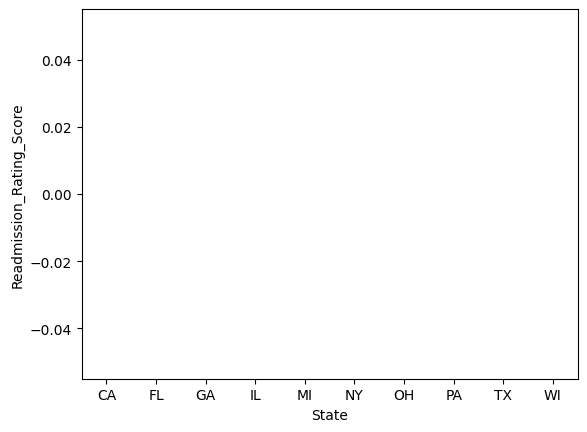

In [39]:
sns.violinplot(
    data=df_violin,
    x='State',
    y='Readmission_Rating_Score',
    palette='pastel',
    inner='box'
)
